# Project 2 - Ames Housing Data and Kaggle Challenge
## Notebook 1/4: Cleaning and Modifications of Train Data and EDA

#### Kristina Joos

Notebook 1: Cleaning and Modfications of Train Data and EDA.  
Notebook 2: Cleaning and Modfications of Test Data.  
Notebook 3: Creation of the Null Treatment Data Frame.  
Notebook 4: Modeling.  

---

### Goal

I am going to use the Ames Housing Data to build a model that predicts unknown house prices for a house with given features.
For this model, I am going to use different features from the data set and deploy a linear regression algorithm to find a model that accurately predicts the house prices and is easy to implement.

---

## 1. EDA and Cleaning

### 1.1 Importing libraries
---

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn.linear_model as linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV

%matplotlib inline

### 1.2 Load the Data
---

The Test and Train Data can be found here: https://www.kaggle.com/c/dsi-us-9-project-2-regression-challenge/dataToday's

Data description can be found here: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In this notebook, I am only working with the train data. The test data will be modified in a separate notebook:
Project 2 - Ames Housing Data and Kaggle Challenge Test Data.

In [220]:
# Read train.csv and safe as train_df.
train_df = pd.read_csv("../data/train.csv")
          

### 1.3 Data Cleaning

---

#### 1.3.1  Overview and optimizing column names

In [221]:
train_df.shape

(2051, 81)

In [222]:
train_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [289]:
train_df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.196045,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,...,47.556802,22.571916,2.591419,16.511458,2.397855,0.015115,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,21.688718,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,...,66.747241,59.845110,25.229615,57.374204,37.782570,0.236366,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,70.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,547.000000,432.000000,508.000000,490.000000,800.000000,5.000000,17000.000000,12.000000,2010.000000,611657.000000


In [223]:
# Renaming Columns to snake case.
train_df.rename(columns = lambda x: x.lower().replace(' ','_'), inplace = True)

#### 1.3.2 Handling Null Values
---
I designed a null value description in another notebook:
Project 2 - Null Value Description Creation Train Data

In [224]:
# Read Null Value Description, safe it as nulltrain_df
nulltrain_df = pd.read_csv("../data/nulltrain.csv", index_col=[0])

In [225]:
nulltrain_df

,sum,mean,first_row_value,feature_description,treatment
pool_qc,2042,2042,NaN,"Pool Quality (Ex, Gd, TA, Fa, NA (No Pool))",Fill NaN with None
misc_feature,1986,1986,NaN,Miscellaneous feature not covered in other cat...,Fill NaN with None
alley,1911,1911,NaN,"Type of alley access to property (Grvl, Pave, ...",Fill NaN with None
fence,1651,1651,NaN,"Fence quality (GdPrv (Good Privacy), MnPrv (Mi...",Fill NaN with None
fireplace_qu,1000,1000,TA,"Fireplace quality (Ex, Gd, TA, Fa, Po, NA (No ...",Fill NaN with None
lot_frontage,330,330,43.0,Linear feet of street connected to property,Fill NaN with median lot frontage in neighborhood
garage_yr_blt,114,114,1997.0,Year garage was built,Fill NaN with None
garage_cond,114,114,TA,"Garage condition (Ex, Gd, TA, Fa, Po, NA (No G...",Fill NaN with None
garage_qual,114,114,TA,"Garage quality (Ex, Gd, TA, Fa, Po, NA (No Gar...",Fill NaN with None
garage_finish,114,114,RFn,"Interior finish of the garage (Fin (Finished),...",Fill NaN with None


__Fill NaN with None:__

In [226]:
# select all rows that have 'Fill NaN with None' as tratment from nulltrain_df and save as fill_in_none Data Frame.

fill_in_none = nulltrain_df.loc[nulltrain_df['treatment']== 'Fill NaN with None',:]

In [227]:
# Peplace np.nan with 'none' in train_df for all columns names that are indices in fill_in_none:

train_df[fill_in_none.index]=train_df[fill_in_none.index].replace(np.nan, 'none')

In [228]:
# Column 'mas_vnr_type' contains capitalized None. Changing it to NaN:

train_df['mas_vnr_type']=train_df['mas_vnr_type'].replace('None', 'none')

In [229]:
# Checking if all the null values that should be filled with none are filled:

train_df[fill_in_none.index].isnull().sum()

pool_qc           0
misc_feature      0
alley             0
fence             0
fireplace_qu      0
garage_yr_blt     0
garage_cond       0
garage_qual       0
garage_finish     0
garage_type       0
bsmt_exposure     0
bsmtfin_type_2    0
bsmt_cond         0
bsmt_qual         0
bsmtfin_type_1    0
mas_vnr_type      0
dtype: int64

__Fill NaN with 0.0:__

In [230]:
# select all rows that have 'Fill with float 0,0' as tratment from nulltrain_df and save as fill_in_zero Data Frame.

fill_in_zero = nulltrain_df.loc[nulltrain_df['treatment']== 'Fill with float 0,0',:]

In [231]:
# Peplace np.nan with 0.0 in train_df for all columns names that are indices in fill_in_zero:

train_df[fill_in_zero.index]=train_df[fill_in_zero.index].replace(np.nan, 0.0)

In [232]:
# Checking if all the null values that should be filled with 0.0 are filled:

train_df[fill_in_zero.index].isnull().sum()

mas_vnr_area      0
bsmt_half_bath    0
bsmt_full_bath    0
garage_cars       0
bsmtfin_sf_1      0
bsmtfin_sf_2      0
bsmt_unf_sf       0
garage_area       0
total_bsmt_sf     0
dtype: int64

__Fill NaN in lot_frontage with median value of the lot_frontage in the neighborhood:__ 

In [233]:
train_df['lot_frontage'] = train_df.groupby('neighborhood')['lot_frontage'].transform(lambda x: x.fillna(x.median()) )

In [234]:
train_df['lot_frontage']=train_df['lot_frontage'].transform(lambda x: x.fillna(x.mean()) )

In [235]:
train_df['lot_frontage'].isnull().sum()

0


#### 1.3.3 Transforming Categorical Data to Numerical Data

In [236]:
# Select and safe all columns that contain string (object) data.

object_columns = train_df.select_dtypes(include=['object']).columns

In [237]:
# Transform ordered categorical string data into numberical string data.
# Make dictionary that has categorical string as key and int as value.

con_to_number = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan: 0, 'none': 0}



In [238]:
# Replace categotical string data with int from con_to_number dictionary.

train_df[['pool_qc',
          'bsmt_cond',
          'bsmt_qual',
          'heating_qc',
          'fireplace_qu',
          'kitchen_qual',
          'garage_qual',
          'garage_cond',
          'exter_cond',
          'exter_qual']] = train_df[['pool_qc',
                                     'bsmt_cond',
                                     'bsmt_qual',
                                     'heating_qc',
                                     'fireplace_qu',
                                     'kitchen_qual',
                                     'garage_qual',
                                     'garage_cond',
                                     'exter_cond', 
                                     'exter_qual']].replace(con_to_number);


In [239]:
# Change dtype from float to int.

train_df[['bsmt_cond',
          'bsmt_qual',
          'heating_qc',
          'fireplace_qu',
          'pool_qc',
          'kitchen_qual',
          'garage_qual',
          'garage_cond',
          'exter_cond',
          'exter_qual']] = train_df[['bsmt_cond',
                                     'bsmt_qual',
                                     'heating_qc',
                                     'fireplace_qu',
                                     'pool_qc',
                                     'kitchen_qual',
                                     'garage_qual',
                                     'garage_cond',
                                     'exter_cond', 
                                     'exter_qual']].astype('int');

In [240]:
# Checking dtypes.

train_df[['bsmt_cond',
          'bsmt_qual',
          'heating_qc',
          'fireplace_qu',
          'pool_qc',
          'kitchen_qual',
          'garage_qual',
          'garage_cond',
          'exter_cond',
          'exter_qual']].dtypes


bsmt_cond       int64
bsmt_qual       int64
heating_qc      int64
fireplace_qu    int64
pool_qc         int64
kitchen_qual    int64
garage_qual     int64
garage_cond     int64
exter_cond      int64
exter_qual      int64
dtype: object

__Make dummies for remaining object columns:__

In [241]:
object_columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence',
       'misc_feature', 'sale_type'],
      dtype='object')

In [242]:
# I choose a couple of features I would like to use in my model and turn them into dummies:

dummie_list = ["neighborhood",'bldg_type','house_style','heating','central_air','garage_type','utilities']

In [243]:
# Make dummie Data Frame:

dummie_df = pd.get_dummies(train_df[dummie_list], drop_first=True)

__Concat train_df with dummie_list_df:__

In [244]:
train_df_dummies = pd.concat([train_df, dummie_df], axis = 1)

In [245]:
train_df_dummies.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_none,utilities_NoSeWa,utilities_NoSewr
0,109,533352170,60,RL,70.0,13517,Pave,none,IR1,Lvl,...,0,1,1,0,0,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,none,IR1,Lvl,...,0,1,1,0,0,0,0,0,0,0


__Combine correlated features/ Making interaction terms:__

In [246]:
train_df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [247]:
# Make "total_liv_sqft" column out of "gr_liv_area", "1st_flr_sf", 
# "2nd_flr_sfand", "total_bsmt_sf", "bsmtfin_sf_1".

# I know now that adding up the features is not the best way to create a new feature.
# I left it in because I didn't want all my model scores to change.

train_df_dummies['total_liv_sqft'] = \
train_df_dummies['gr_liv_area']+train_df_dummies['1st_flr_sf']+train_df_dummies['2nd_flr_sf']\
+train_df_dummies['total_bsmt_sf']+train_df_dummies['bsmtfin_sf_1']



In [248]:
train_df_dummies[['gr_liv_area','total_bsmt_sf','1st_flr_sf','2nd_flr_sf','bsmtfin_sf_1']].corr()

,gr_liv_area,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,bsmtfin_sf_1
gr_liv_area,1.000000,0.454245,0.562441,0.639092,0.215735
total_bsmt_sf,0.454245,1.000000,0.808351,-0.216139,0.539251
1st_flr_sf,0.562441,0.808351,1.000000,-0.268855,0.462360
2nd_flr_sf,0.639092,-0.216139,-0.268855,1.000000,-0.167591
bsmtfin_sf_1,0.215735,0.539251,0.462360,-0.167591,1.000000


In [249]:
train_df_dummies['total_bsmt_1st_flr_sf']=train_df_dummies['total_bsmt_sf']*train_df_dummies['1st_flr_sf']

In [250]:
train_df_dummies[['garage_area', 'garage_cars']].corr()

,garage_area,garage_cars
garage_area,1.000000,0.893442
garage_cars,0.893442,1.000000


In [251]:
# Make "garage_total" column out of "garage_area" and "garage_cars".

train_df_dummies['garage_total'] = train_df_dummies['garage_area']*train_df_dummies['garage_cars']



### 1.4 EDA
---

In [252]:
train_df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.196045,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,...,47.556802,22.571916,2.591419,16.511458,2.397855,0.015115,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,21.688718,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,...,66.747241,59.845110,25.229615,57.374204,37.782570,0.236366,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,70.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,547.000000,432.000000,508.000000,490.000000,800.000000,5.000000,17000.000000,12.000000,2010.000000,611657.000000


In [253]:
train_df_dummies.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_none,utilities_NoSeWa,utilities_NoSewr,total_liv_sqft,total_bsmt_1st_flr_sf,garage_total
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2.051000e+03,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.196045,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,...,0.013164,0.064359,0.005363,0.261336,0.055095,0.000488,0.000488,4492.704047,1.375524e+06,988.419308
std,843.980841,1.886918e+08,42.824223,21.688718,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,...,0.114006,0.245451,0.073055,0.439470,0.228221,0.022081,0.022081,1498.473948,1.285671e+06,739.495246
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000,0.000000e+00,0.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3504.500000,6.972250e+05,319.500000
50%,1486.000000,5.354532e+08,50.000000,70.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4286.000000,1.067307e+06,960.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5210.000000,1.800964e+06,1152.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23038.000000,2.866812e+07,5920.000000


__Check correlations between 'saleprice' and the features:__

In [254]:
saleprice_corr_df = train_df_dummies.corr()[['saleprice']].abs().sort_values(by = 
                'saleprice', ascending = False).head(30)
saleprice_corr_df

,saleprice
saleprice,1.000000
overall_qual,0.800207
total_liv_sqft,0.786397
exter_qual,0.712146
gr_liv_area,0.697038
kitchen_qual,0.692336
garage_total,0.690596
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303


In [255]:
features = saleprice_corr_df[saleprice_corr_df['saleprice']>=0.5]

In [256]:
features.index

Index(['saleprice', 'overall_qual', 'total_liv_sqft', 'exter_qual',
       'gr_liv_area', 'kitchen_qual', 'garage_total', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'bsmt_qual', 'year_built',
       'year_remod/add', 'total_bsmt_1st_flr_sf', 'fireplace_qu', 'full_bath',
       'totrms_abvgrd', 'mas_vnr_area'],
      dtype='object')

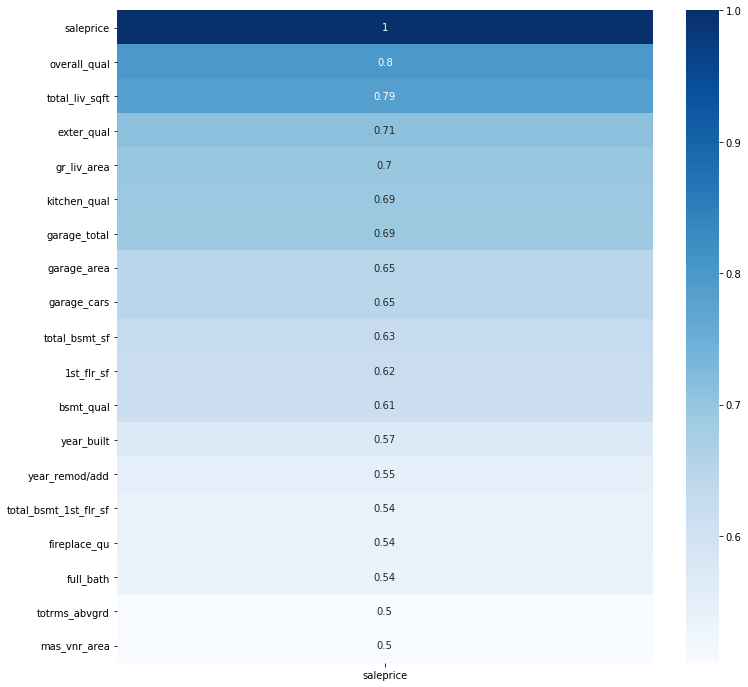

In [257]:
plt.figure(figsize = (12,12))
sns.heatmap(saleprice_corr_df[saleprice_corr_df['saleprice']>=0.5],annot=True, cmap = 'Blues');

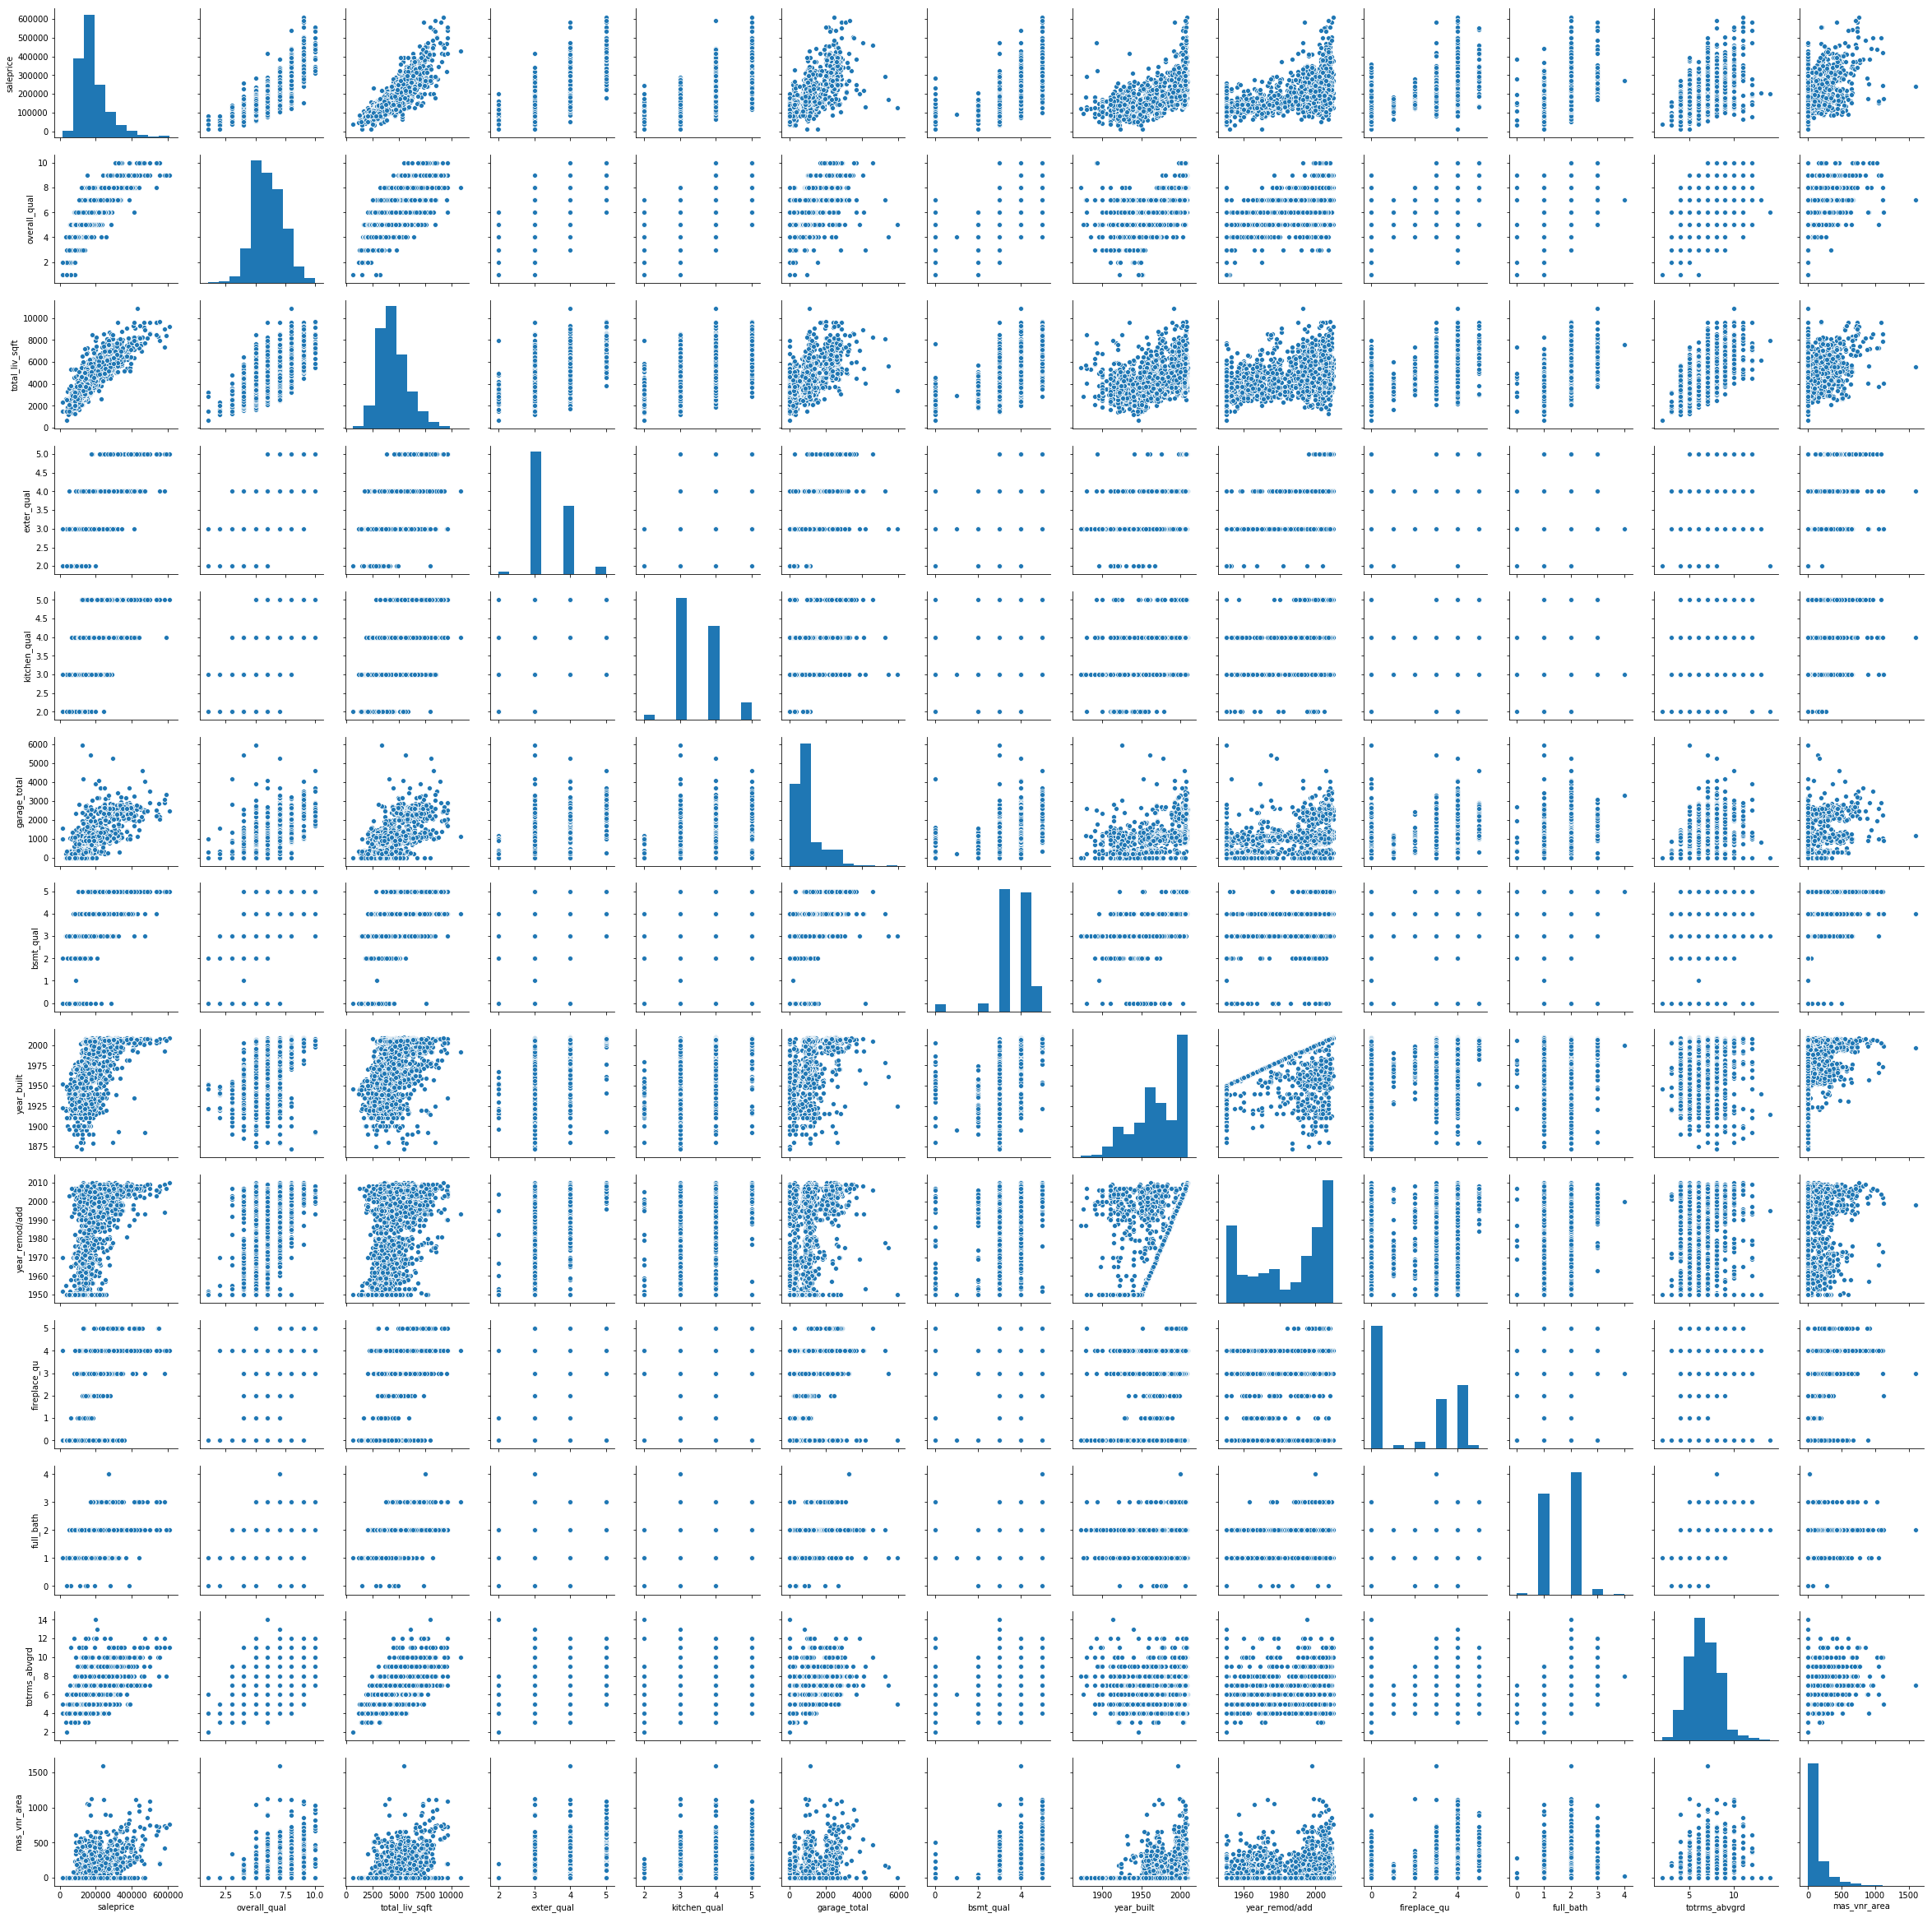

In [290]:
sns.pairplot(train_df_dummies[['saleprice', 'overall_qual', 'total_liv_sqft', 'exter_qual',
'kitchen_qual', 'garage_total', 'bsmt_qual', 'year_built',

'year_remod/add', 'fireplace_qu', 'full_bath', 'totrms_abvgrd', 'mas_vnr_area']]);

__Dropping outliers:__

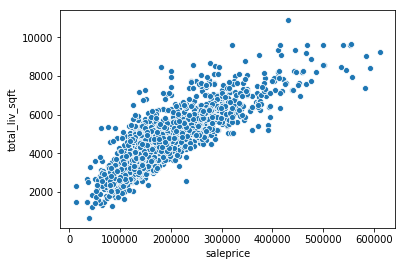

In [306]:
sns.scatterplot(train_df_dummies['saleprice'],train_df_dummies['total_liv_sqft']);

In [260]:
train_df_dummies[train_df_dummies['total_liv_sqft']>15000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_none,utilities_NoSeWa,utilities_NoSewr,total_liv_sqft,total_bsmt_1st_flr_sf,garage_total
960,1499,908154235,60,RL,313.0,63887,Pave,none,IR3,Bnk,...,0,0,0,0,0,0,0,23038.0,28668120.0,2836.0
1885,2181,908154195,20,RL,128.0,39290,Pave,none,IR1,Bnk,...,0,0,0,0,0,0,0,19295.0,25959025.0,3462.0


In [261]:
train_df_dummies.drop(train_df_dummies[train_df_dummies['total_liv_sqft']>15000].index, inplace = True)


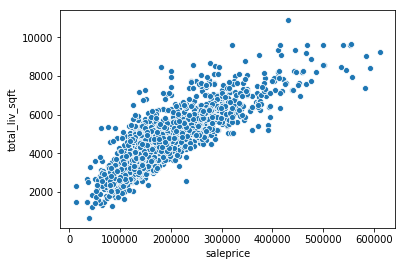

In [304]:
sns.scatterplot(train_df_dummies['saleprice'],train_df_dummies['total_liv_sqft']);


#### saleprice distribution

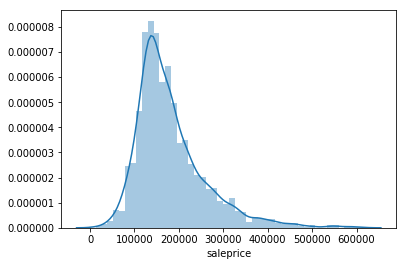

In [263]:
sns.distplot(train_df_dummies.saleprice);

In [264]:
train_df_dummies['saleprice_log'] = train_df_dummies.loc[:,'saleprice'].map(np.log)
                                                       


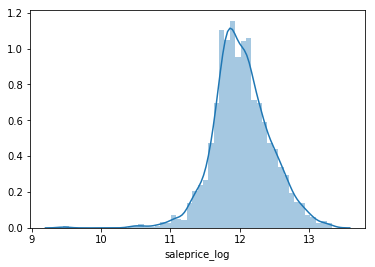

In [265]:
sns.distplot(train_df_dummies.saleprice_log);

__saleprice_log distribution looks more like a normal distribution__


### 1.5 Calculating the Mean Squared Error as a baseline score for Modeling
---

In [287]:
resids = train_df_dummies['saleprice']-train_df_dummies['saleprice'].mean()

In [288]:
 np.mean(resids**2)

6284773122.026522

### 1.6 Saving Cleaned and Modified Train Data
---

In [267]:
train_df_dummies.to_csv(r"../data/train_df_dummies.csv", index=False)